# Setup

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2)
ERROR: No matching distribution found for torch==1.8.1+cu111

[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Loading Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Aryan/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-19 Python-3.10.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Making Detections from Yolov5s

In [7]:
img = cv2.imread('./down.jpg',1)

In [8]:
results = model(img)
results.print()

image 1/1: 408x612 25 cars, 2 trucks
Speed: 3.0ms pre-process, 134.8ms inference, 62.3ms NMS per image at shape (1, 3, 448, 640)


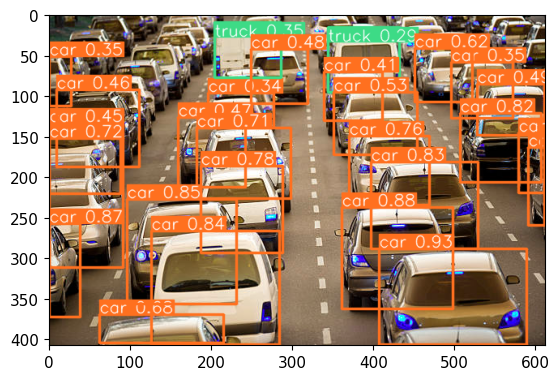

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[ 56,  53,  48],
         [ 79,  73,  66],
         [104,  96,  83],
         ...,
         [114, 110, 109],
         [102,  97,  98],
         [ 74,  72,  72]],
 
        [[ 55,  50,  47],
         [ 75,  72,  64],
         [ 99,  95,  84],
         ...,
         [115, 111, 110],
         [ 99,  95,  94],
         [ 69,  67,  67]],
 
        [[ 53,  48,  45],
         [ 70,  68,  60],
         [ 89,  89,  77],
         ...,
         [112, 107, 104],
         [ 94,  90,  89],
         [ 65,  61,  60]],
 
        ...,
 
        [[ 72,  57,  38],
         [ 75,  60,  41],
         [ 77,  62,  43],
         ...,
         [ 69,  54,  45],
         [ 70,  55,  46],
         [ 71,  56,  47]],
 
        [[ 72,  57,  38],
         [ 74,  59,  40],
         [ 76,  61,  42],
         ...,
         [ 64,  49,  40],
         [ 66,  51,  42],
         [ 67,  52,  43]],
 
        [[ 72,  57,  38],
         [ 74,  59,  40],
         [ 76,  61,  42],
         ...,
         [ 63,  48,  39],
  

# Model Training

In [8]:
import uuid   # Unique identifier
import os
import time

In [9]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [16]:
number_imgs = 20

# Initialize webcam
cap = cv2.VideoCapture(0)

# Function to preprocess images
def preprocess_image(image):
    # Resize image to 640x640
    image = cv2.resize(image, (640, 640))
    # Convert image to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert image to PyTorch tensor
    image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # Ensure correct tensor shape and type
    # Normalize pixel values to range [0, 1]
    image /= 255.0
    return image

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)  # Delay for 5 seconds
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Read frame from webcam
        ret, frame = cap.read()
        
        # Preprocess frame
        preprocessed_frame = preprocess_image(frame)
        
        # Generate unique identifier
        unique_id = str(uuid.uuid1())
        
        # Save preprocessed frame to file
        imgname = os.path.join(IMAGES_PATH, label+'.'+unique_id+'.jpg')
        cv2.imwrite(imgname,  cv2.cvtColor(preprocessed_frame.permute(1, 2, 0).numpy() * 255, cv2.COLOR_RGB2BGR))  # Save original BGR image
        
        # Display frame
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(0.7)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release webcam and close windows
cap.release()
cv2.destroyAllWindows()

# Augmentation Pipeline

In [25]:

from imgaug import augmenters as iaa
def augment_images(images):
    # Define augmentation pipeline
    seq = iaa.Sequential([
        iaa.Fliplr(1.0),  # Horizontal flip with probability 1.0 (always)
        # Add more augmentation techniques here if needed
    ])
    
    # Augment images
    augmented_images = seq(images=images)
    
    return augmented_images

for label in labels:
    # List all images collected for the label
    image_files = [f for f in os.listdir(IMAGES_PATH) if f.startswith(label)]
    
    # Loop through collected images
    for image_file in image_files:
        # Read image
        image_path = os.path.join(IMAGES_PATH, image_file)
        image = cv2.imread(image_path)
        
        # Apply augmentation
        augmented_image = augment_images(images=[image])
        
        # Save augmented image with unique identifier
        augmented_imgname = os.path.join(IMAGES_PATH, 'augmented_' + label + '_' + str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(augmented_imgname, augmented_image[0])

print("Image augmentation completed.")

Image augmentation completed.


In [10]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.ace9e90a-fdc3-11ee-bd19-9083880c12dc.jpg


In [11]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.ad4f2b78-fdc3-11ee-9b81-9083880c12dc.jpg
data\images\awake.ad4f2b79-fdc3-11ee-a806-9083880c12dc.jpg
data\images\awake.ad4f2b7a-fdc3-11ee-8b5b-9083880c12dc.jpg
data\images\awake.ad4f2b7b-fdc3-11ee-9b71-9083880c12dc.jpg
data\images\awake.ad4f2b7c-fdc3-11ee-82f1-9083880c12dc.jpg
data\images\awake.ad4f2b7d-fdc3-11ee-afc8-9083880c12dc.jpg
data\images\awake.ad4f2b7e-fdc3-11ee-81cb-9083880c12dc.jpg
data\images\awake.ad4f528b-fdc3-11ee-bf6d-9083880c12dc.jpg
data\images\awake.ad4f528c-fdc3-11ee-9d2d-9083880c12dc.jpg
data\images\awake.ad4f528d-fdc3-11ee-a779-9083880c12dc.jpg
data\images\awake.ad4f528e-fdc3-11ee-a4e8-9083880c12dc.jpg
data\images\awake.ad4f528f-fdc3-11ee-a8bc-9083880c12dc.jpg
data\images\awake.ad4f5290-fdc3-11ee-8d0d-9083880c12dc.jpg
data\images\awake.ad4f5291-fdc3-11ee-a620-9083880c12dc.jpg
data\images\awake.ad4f5292-fdc3-11ee-98ee-9083880c12dc.jpg
data\images\awake.ad4f5293-fdc3-11ee-87bb-9083880c12dc.jpg
data\images\awake.ad4f5294-fdc3-11ee-977c-9083880c12dc.j

In [12]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5m.pt --workers 2

train: weights=yolov5m.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\Aryan\Desktop\college\6th': No such file or directory
YOLOv5  2024-4-16 Python-3.10.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperp

In [35]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Aryan/.cache\torch\hub\master.zip
YOLOv5  2024-4-19 Python-3.10.6 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [36]:
img = os.path.join('data', 'images', 'WIN_20240419_00_59_20_Pro.jpg')

In [37]:
results = model(img)

In [38]:
results.print()

image 1/1: 720x1280 1 drowsy
Speed: 7.0ms pre-process, 12.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


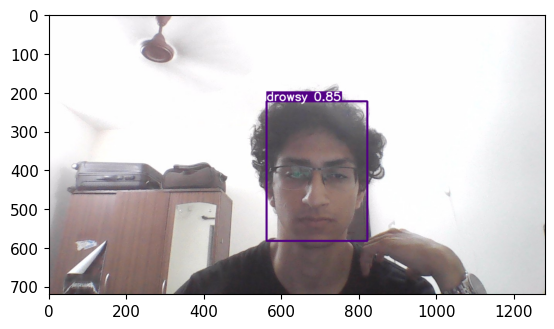

In [39]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [84]:
im=cv2.imread('./yolov5/runs/train/exp4/results.png')

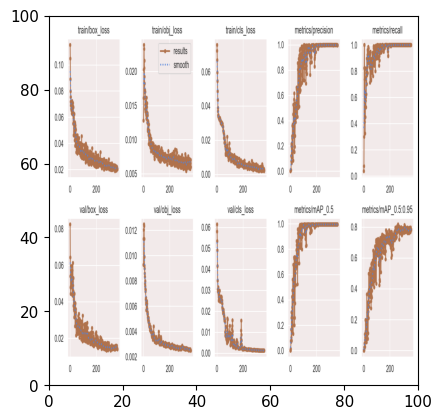

In [89]:
plt.imshow(im, extent=[0, 100, 0, 100])

In [90]:
!pip install --upgrade pillow


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
